Import the `config.json` file for which you would like to run simulations, and the `SimulationEnvironment` class
<details>
<summary><b>Show Example config.json</b></summary>

```json
{
    "simulation_year": 2006,
    "environment": {
        "latitude": 18.53,
        "longitude": 73.85,
        "timezone": "Asia/Kolkata"
    },
    "solar_collector": {
        "f_r_tao_alpha": 0.675,
        "f_r_u_l": 5.656,
        "tilt": 33
    },
    "load_profile": {
        "litres_per_day": 4500,
        "water_density": 998,
        "specific_heat_water": 4180,
        "desired_temperature": 60,
        "consumption_pattern": [
            {
                "start": "06:00",
                "end": "08:00"
            },
            {
                "start": "10:00",
                "end": "11:00"
            },
            {
                "start": "12:00",
                "end": "13:00"
            },
            {
                "start": "14:00",
                "end": "18:00"
            }
        ]
    },
    "storage_tank": {
        "type": "Cylindrical",
        "height_to_diameter_ratio": 1,
        "wall_material": "Mild steel",
        "storage_wall_thicknes": 0.006,
        "thermal_conductivity_wall": 50,
        "insulation_material": "Glass wool",
        "insulation_thickness": 0.2,
        "insulation_thermal_conductivity": 0.04
    }
}
```
</details>

In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

CONFIG_FILE = f'{EXAMPLE_DIR}/config_new_water.json'
from models import SimulationEnvironment

We will start the simulation with the solar collector area $A_c = 50$ and the Volume of the storage tank $V_{st} = 5$

In [2]:
AREA = 50
VOLUME = 5
simulation = SimulationEnvironment(AREA, VOLUME, CONFIG_FILE)

Visualizing the Water consumption pattern defined in the provided `config.json`

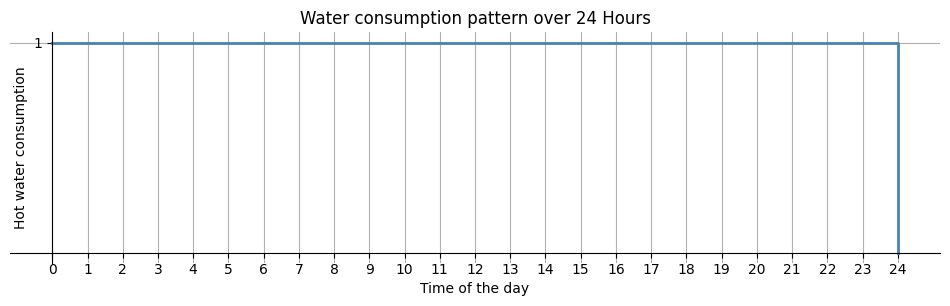

In [3]:
simulation.plot_water_consumption()

Run simulation for for a single day, for the desired `month` and `day` 

Total energy consumed: 1.065 GJ
Auxiliary energy consumed: 0.106 GJ
The solar fraction (F) is: 0.901


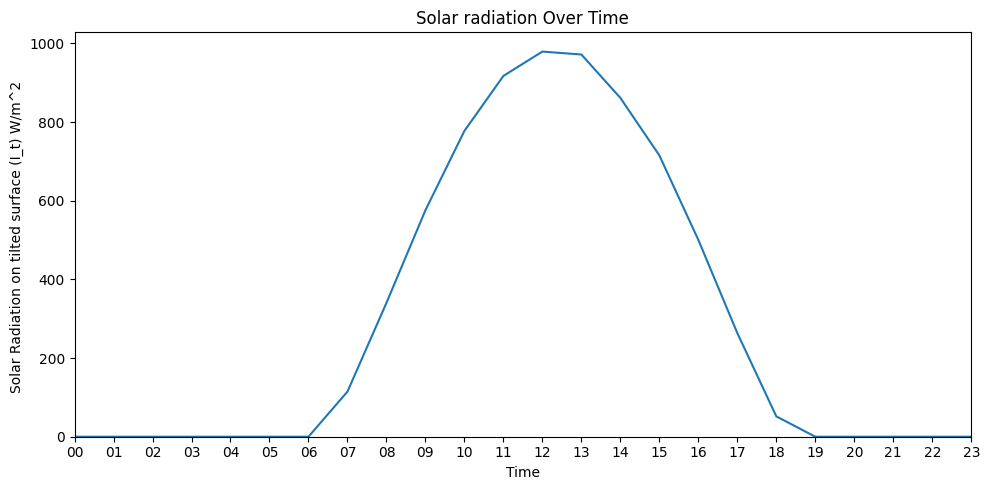

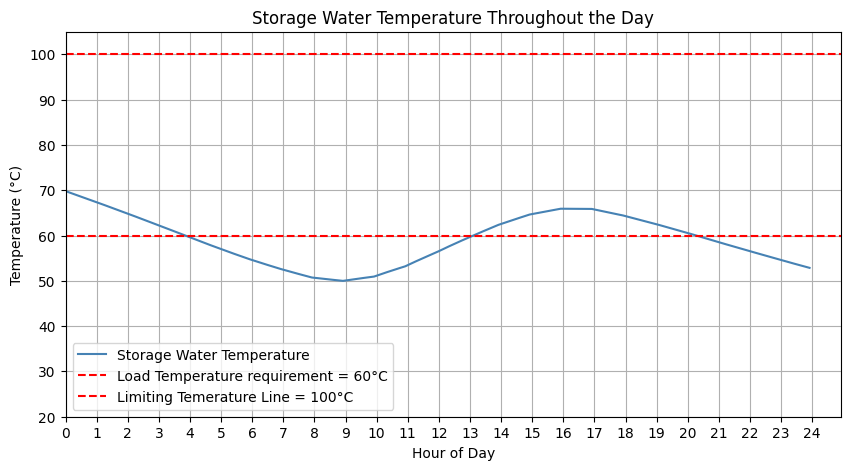

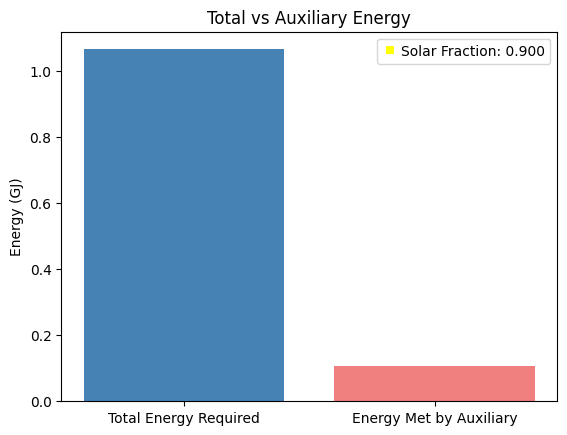

In [4]:
simulation.simulate_single_day(month=4, day=15)

Run simulation for the desired `month`

Total energy consumed: 43.482 GJ
Auxiliary energy consumed: 21.027 GJ
The solar fraction (F) is: 0.516


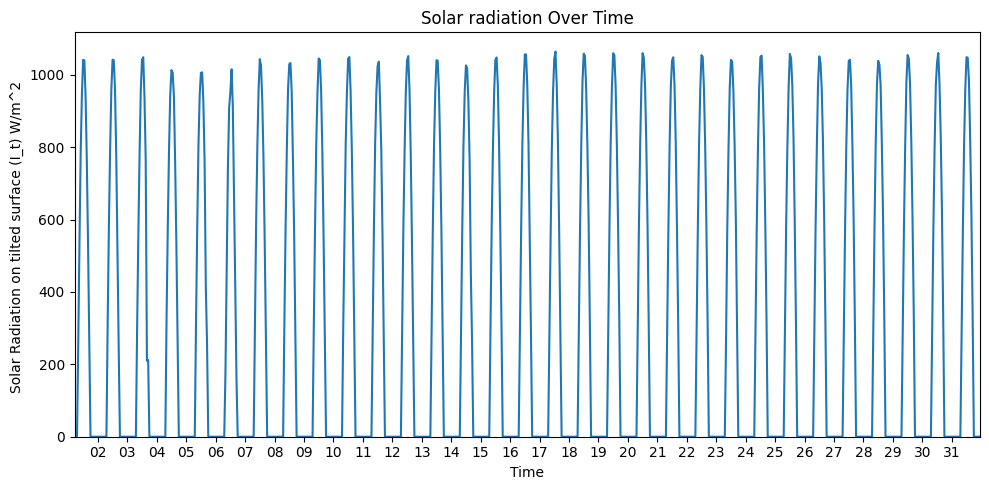

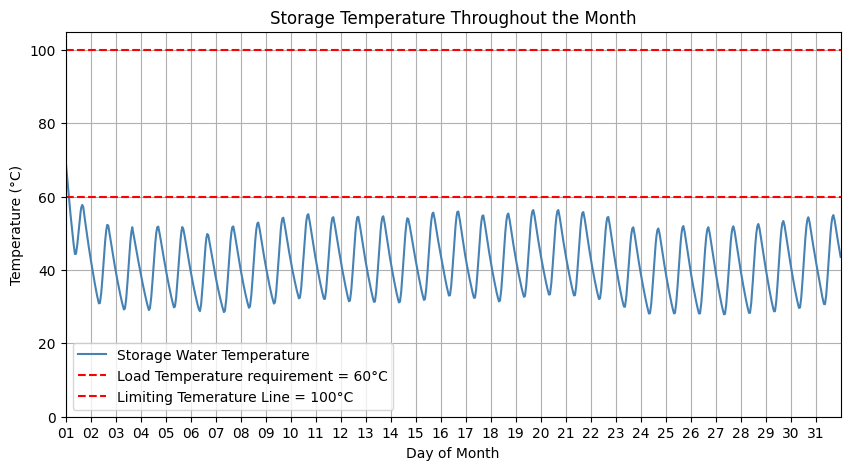

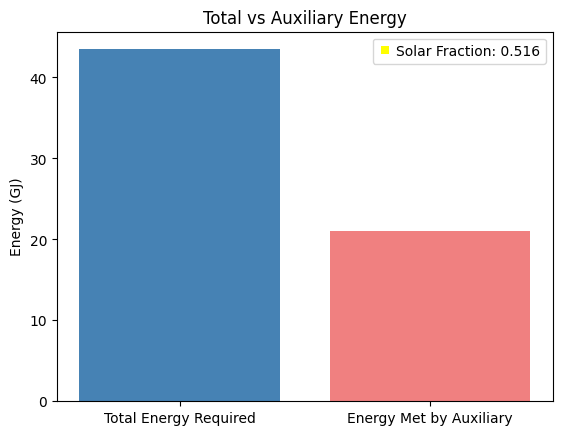

In [5]:
simulation.simulate_month(month=1)

Run simulation for the the entire `year`

Total energy consumed: 468.164 GJ
Auxiliary energy consumed: 261.615 GJ
The solar fraction (F) is: 0.441


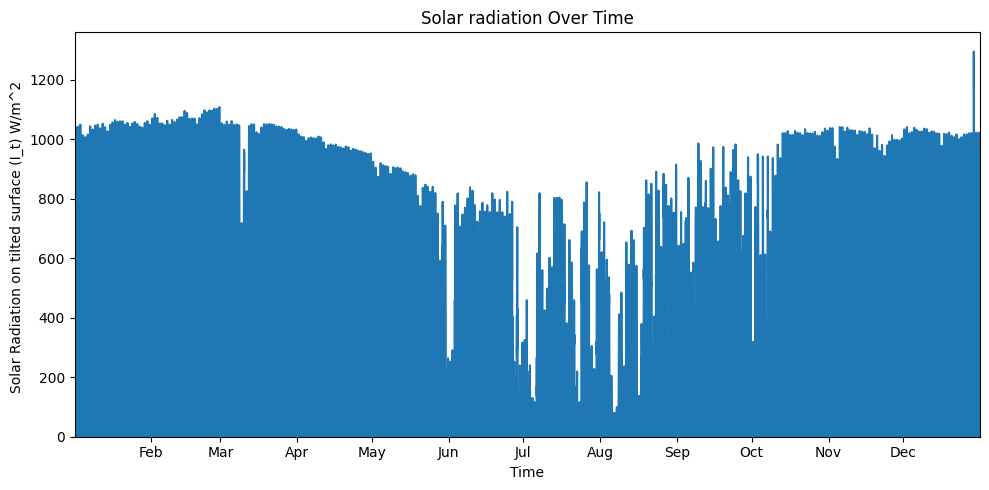

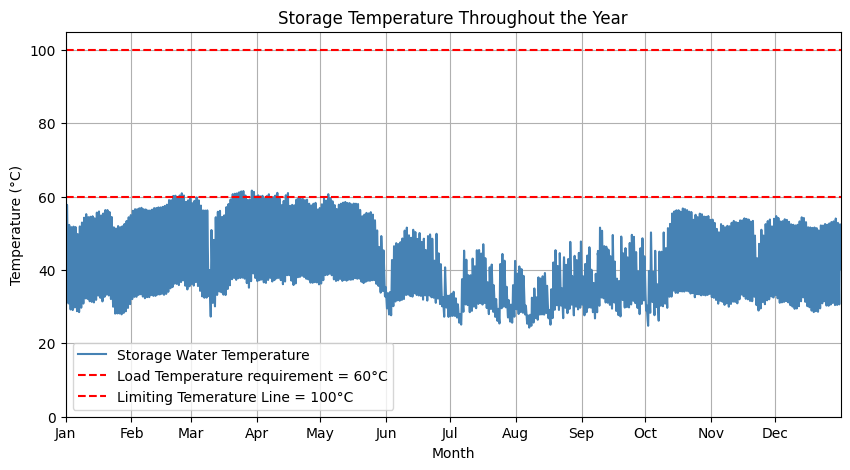

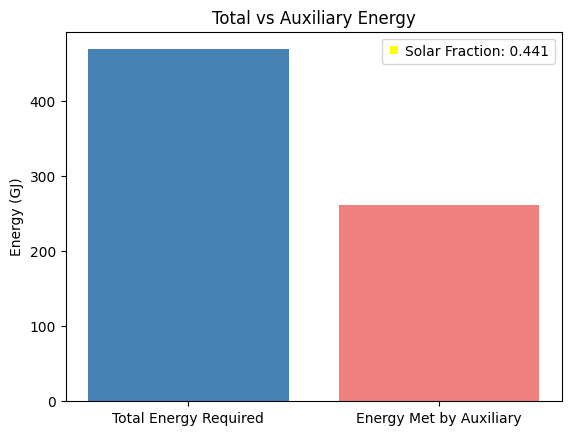

In [6]:
simulation.simulate_entire_year()

From the above simulations, we can infer that the stroage temerature $T_{st}$ is well below the limiting temerature line (100 °C). 
Also, in the month of `January`, when the peak solar radiation is still quite large ($\approx 1000 W/m^2$), $10 \%$ energy is met by the auxiliary heater. 

It implies that we should increase the Solar Collector area ($A_c$).

Lets try increasing the collector area to $100$ and run the simulations again!

In [7]:
simulation.collector_area = 100


Total energy consumed: 468.164 GJ
Auxiliary energy consumed: 143.773 GJ
The solar fraction (F) is: 0.693


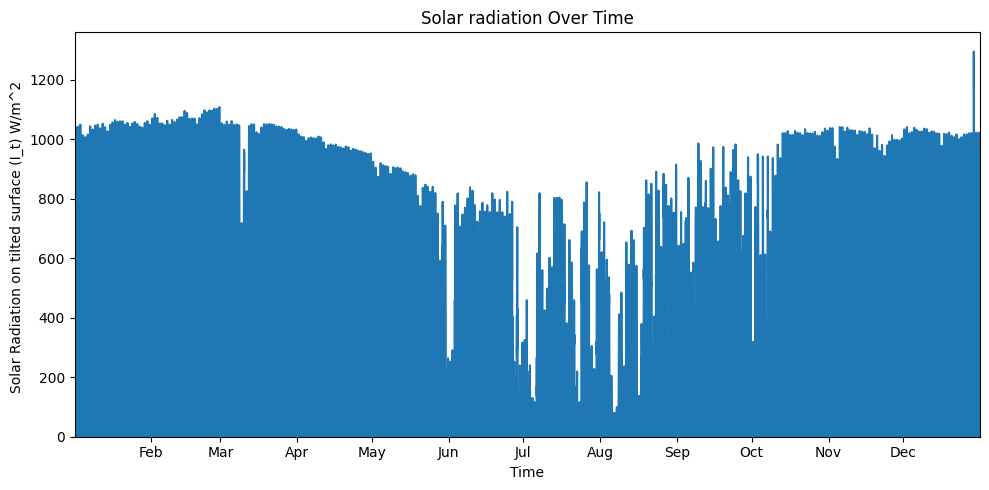

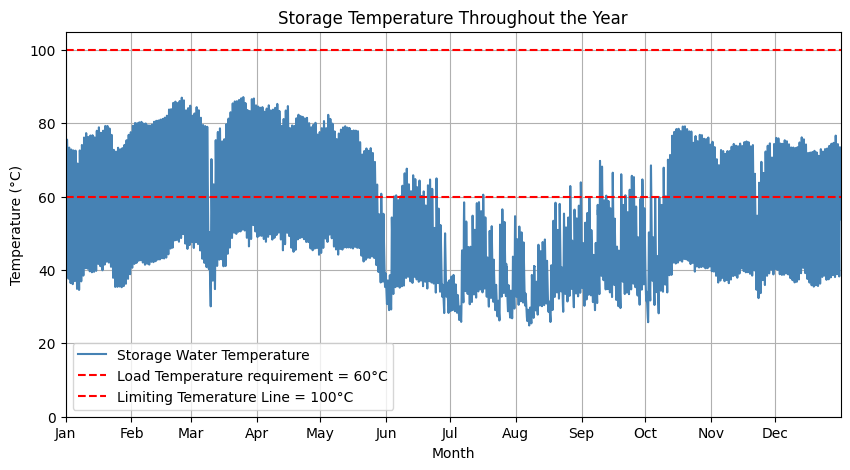

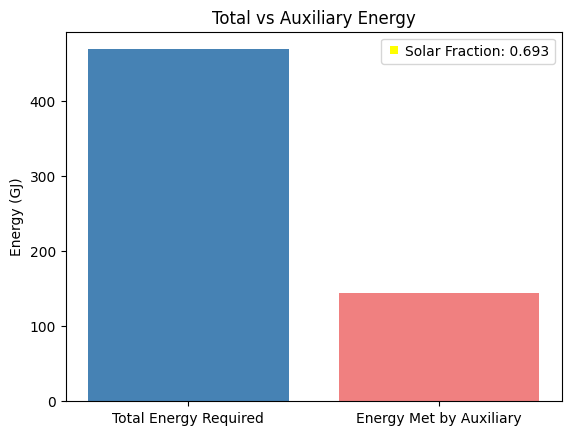

In [8]:
simulation.simulate_entire_year()


With collector area $A_c = 100$, the temerature of water inside the storage tank ($T_{st}$) shoots above $100°C$ during the months of `February` to `May`.


This is an undesirable situation since it will lead to **steam formation** and our system is designed to function only when the temerature of water is below $100 °C$. 


It implies that we must either: 
1. Decrese the collector area
2. Increase the storage tank volume

Let's try decrementing the collector area to $A_c = 70$

In [9]:
simulation.collector_area = 70
simulation.storage_tank_volume = 5

Total energy consumed: 468.164 GJ
Auxiliary energy consumed: 205.522 GJ
The solar fraction (F) is: 0.561


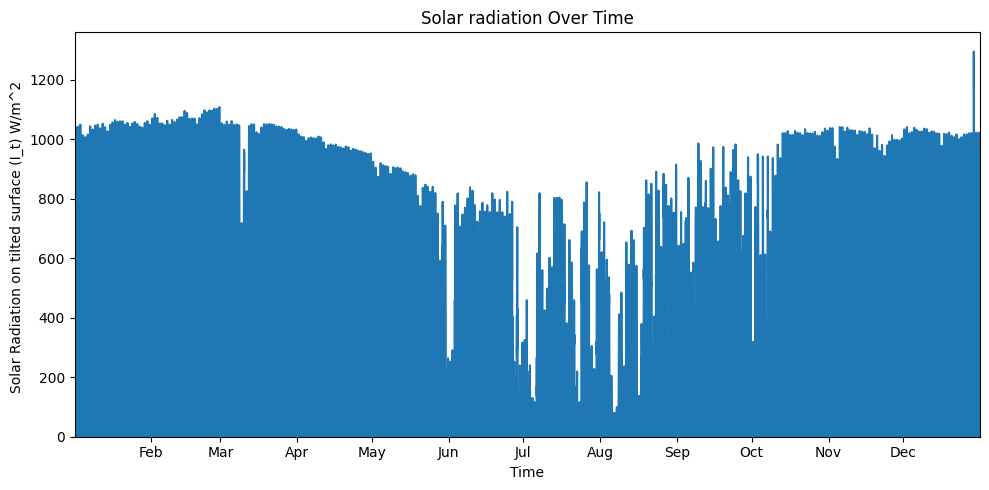

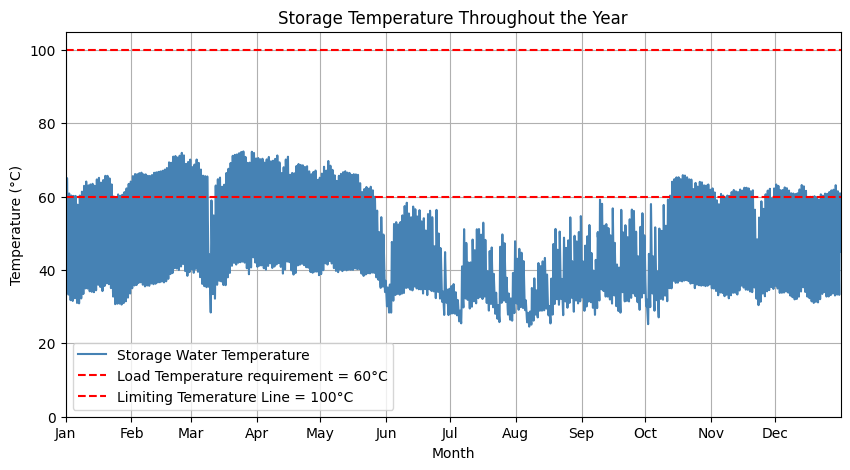

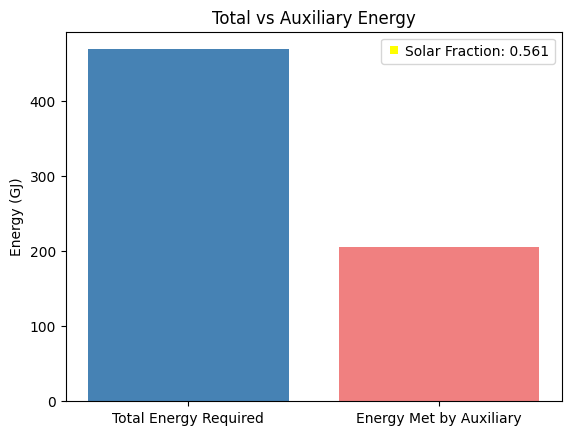

In [10]:
simulation.simulate_entire_year()

In [11]:
simulation.collector_area = 70
simulation.storage_tank_volume = 10

Total energy consumed: 468.164 GJ
Auxiliary energy consumed: 197.725 GJ
The solar fraction (F) is: 0.578


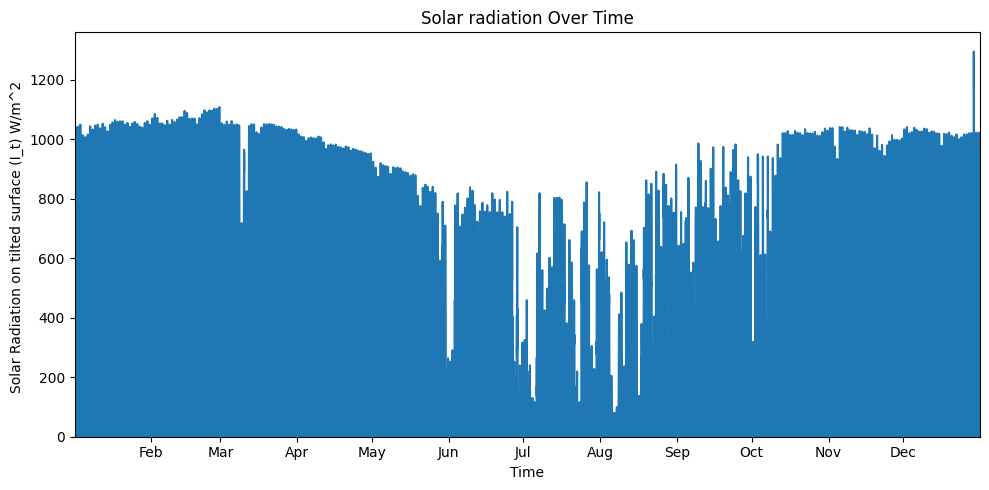

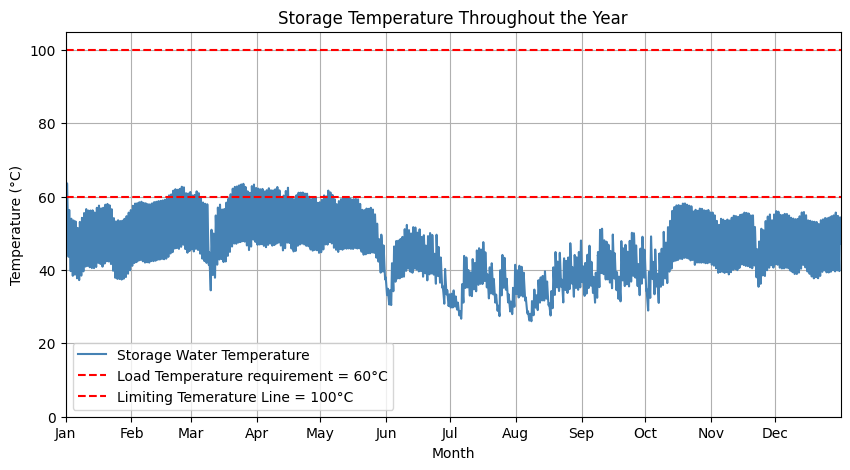

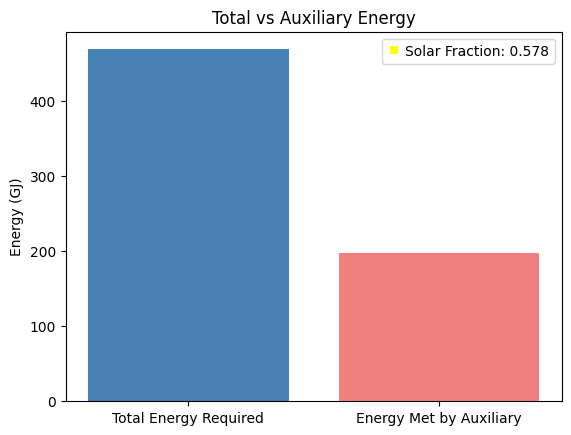

In [12]:
simulation.simulate_entire_year()